### Table of Contents

1. [Setup and Data Loading](#setup-and-data-loading)  

2. [Demographic Structure and Public Spending Analysis](#demographic-structure-and-public-spending-analysis)  
    &nbsp;&nbsp;&nbsp;&nbsp;• [Age Distribution (Gilang)](#age-distribution)  
    &nbsp;&nbsp;&nbsp;&nbsp;• [Health Expenditure vs Dependency Ratio (Fauziah)](#health-expenditure-vs-dependency-ratio)  
    &nbsp;&nbsp;&nbsp;&nbsp;• [Education Expenditure vs Dependency Ratio (Nomin)](#education-expenditure-vs-dependency-ratio)  
    &nbsp;&nbsp;&nbsp;&nbsp;• [Regression Analysis (Fauziah & Nomin)](#regression)  

3. [Expenditure Projection Analysis (Gilang)](#Health-and-Education-Expenditure-Projections-(to-2050))  

4. [Health–Education Efficiency Index (HEE) Analysis (Patchara)](#healtheducation-efficiency-index-hee-analysis)


## Setup and Data Loading

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
#Import function for cleaning, merged, and import data from cleaning_data.py and Import_and_Cleaning.py
sys.path.append('../src/Import_and_Cleaning')
from import_and_merge_data import load_and_merge_all_data

df_main = load_and_merge_all_data()
df_main.to_csv('../data/interim/merged_data.csv', index=False)
df_main.head()

,Country,ISO3,Year,Health_Expenditure,Education_Expenditure,Dependency_Ratio,Dependency_Ratio_Old,Dependency_Ratio_Young,Life_Expectancy,Mortality_Rate,average_schooling,learning_scores,GDP_percapita,Population,income_level,Region
0,Argentina,ARG,2000,8.220011,4.58031,60.8399424011737,15.536780754278,45.3031616468956,73.910,16.7,8.802,NaN,7637.014892,37213984,Upper middle income,Latin America & Caribbean
1,Argentina,ARG,2001,8.371799,4.83374,60.442088771688,15.6034995940423,44.8385891776457,74.154,16.2,8.870,NaN,7141.475077,37624825,Upper middle income,Latin America & Caribbean
2,Argentina,ARG,2002,7.393312,4.01734,60.0100181534326,15.6661577646685,44.3438603887641,74.312,15.8,9.395,NaN,2569.699635,38029349,Upper middle income,Latin America & Caribbean
3,Argentina,ARG,2003,6.894516,3.53505,59.5157720560259,15.7037442216745,43.8120278343514,74.307,15.4,9.920,NaN,3320.477751,38424282,Upper middle income,Latin America & Caribbean
4,Argentina,ARG,2004,7.228683,3.48652,58.9908808603745,15.7354699936422,43.2554108667324,74.871,14.9,10.010,NaN,4242.020991,38815916,Upper middle income,Latin America & Caribbean


This is our main dataset, consists of 15 columns:
1. Country
2. ISO Code
3. Health Expenditure (% of GDP)
4. Education Expenditure (% of GDP)
5. Dependency Ratio (% of working-age population)
6. Dependency Ratio Old (older than 64, % of working-age population)
7. Dependency Ratio Young (younger than 15, % of working-age population)
8. Life Expectancy (years)
9. Mortality Rate (per1000 live births)
10. Average Year Schooling (years)
11. Learning Outcomes (score)
12. GDP per capita (USD)
13. Population
14. Income Level Category
15. Region

## Demographic Structure and Public Spending

### Age Distribution

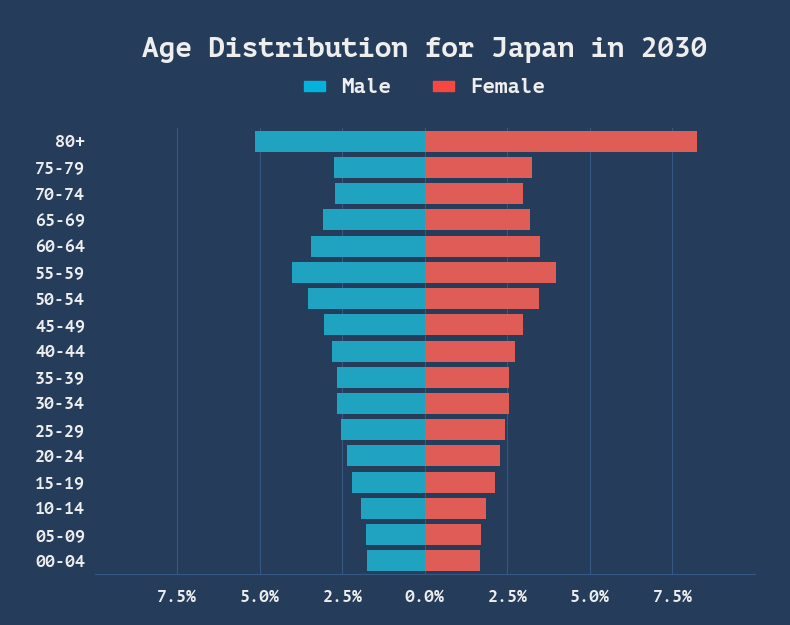

In [3]:
sys.path.append('../src/visualization')
from age_dist_visual import set_seaborn_style, create_age_distribution, format_ticks, add_legend, create_image_from_figure, add_padding_to_chart, generate_country_figure, create_grid

country_code = "JPN"
year = "2030"

population_ratio_female = pd.read_csv("../data/raw/secondary/population_ratio_female.csv", index_col=None)
population_ratio_male = pd.read_csv("../data/raw/secondary/population_ratio_male.csv", index_col=None)

# Set styles
font_family = "PT Mono"
background_color = "#253D5B"
grid_color = "#355882"
text_color = "#EEEEEE"
set_seaborn_style(font_family, background_color, grid_color, text_color)

country_name = population_ratio_female[population_ratio_female.country_code == country_code]["country_name"].iloc[0]
# Create plot
fig = plt.figure(figsize=(7.5, 6))
ax = create_age_distribution(population_ratio_female, population_ratio_male, country_code, year)
format_ticks(ax, xformat="percentage", xlim=(-10, 10))
add_legend(x=0.5, y=1.09, background_color=background_color)
plt.title(f"Age Distribution for {country_name} in {year}", y=1.14, fontsize=20)

# Convert to image and add padding
image = create_image_from_figure(fig)
image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
image

### Correlation Analysis

### Regression

$$
\text{HealthExp}_{it} = \beta_0 + \beta_1 \cdot \text{DepOld}_{it} + \beta_2 \cdot \text{DepYoung}_{it} + \beta_3 \cdot \text{LnGDPpc}_{it} + \epsilon_{it}
$$

- $\beta_0$: constant term  
- $\beta_1$: effect of aging  
- $\beta_2$: effect of youth burden  
- $\beta_3$: effect of LnGDP per capita  
- $\epsilon_{it}$: error term for country $i$ in year $t$

In [ ]:
df = pd.read_csv("../data/interim/merged_data.csv")

# Create log of GDP per capita
df["log_GDP_percapita"] = np.log(df["GDP_percapita"])

# Filter data to years 2000–2022 and drop rows with missing values in key variables
df_model = df[
    (df["Year"] <= 2022) &
    df["Health_Expenditure"].notna() &
    df["Dependency_Ratio_Old"].notna() &
    df["Dependency_Ratio_Young"].notna() &
    df["log_GDP_percapita"].notna()
]

# Run OLS regression
model = smf.ols(
    formula="Health_Expenditure ~ Dependency_Ratio_Old + Dependency_Ratio_Young + log_GDP_percapita",
    data=df_model
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Health_Expenditure   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     392.4
Date:                Mon, 26 May 2025   Prob (F-statistic):          4.92e-179
Time:                        16:09:26   Log-Likelihood:                -2586.1
No. Observations:                1241   AIC:                             5180.
Df Residuals:                    1237   BIC:                             5201.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4

The regression results suggest that for every 1 percentage point increase in the old-age dependency ratio, health expenditure (as a % of GDP) **increases by approximately 0.173 percentage points**, holding other variables constant.

## Health and Education Expenditure Projections (to 2050)

### GDP per capita projection using log-linear regression

In [10]:
sys.path.append("../src/projection_data")
from projection_data import project_log_gdp

df_projected = project_log_gdp()

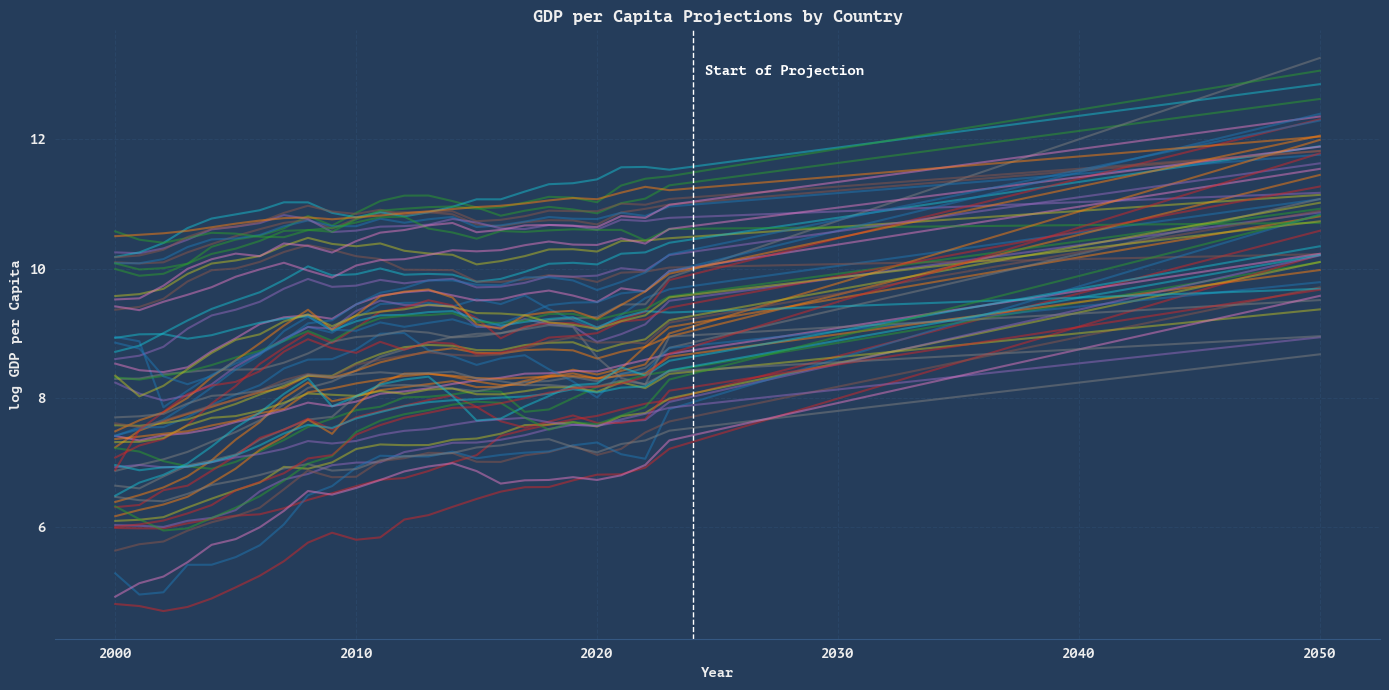

In [11]:
# Plot
plt.figure(figsize=(14, 7))

for iso, group in df_projected.groupby("ISO3"):
    plt.plot(group["Year"], group["log_GDP_percapita"], alpha=0.5)  # light lines

# Add vertical line to mark the start of projection (2024)
plt.axvline(x=2024, color='white', linestyle='--', linewidth=1)
plt.text(2024.5, plt.ylim()[1]*0.95, 'Start of Projection', color='white')

plt.title("GDP per Capita Projections by Country")
plt.xlabel("Year")
plt.ylabel("log GDP per Capita")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Health Expenditure Projection

Using the regression model result in previous part, 

$$
\widehat{\text{HealthExp}}_{it} = -4.8660 + 0.1732 \cdot \text{DepOld}_{it} + 0.0421 \cdot \text{DepYoung}_{it} + 0.8212 \cdot \text{LnGDPpc}_{it}
$$

we predict the value of health expenditure

In [ ]:
# List of predictors 
predictors = ["Dependency_Ratio_Old", "Dependency_Ratio_Young", "log_GDP_percapita"]

# Use df_projected and select future years where Health_Expenditure is missing
df_future = df_projected[
    (df_projected["Year"] > 2022) &
    df_projected["Health_Expenditure"].isna() &
    df_projected["Dependency_Ratio_Old"].notna() &
    df_projected["Dependency_Ratio_Young"].notna() &
    df_projected["log_GDP_percapita"].notna()
].copy()

# Predict using the regression model
df_future["Health_Expenditure"] = model.predict(df_future[predictors])

# Update the df_projected with predicted Health_Expenditure
df_projected.update(df_future)

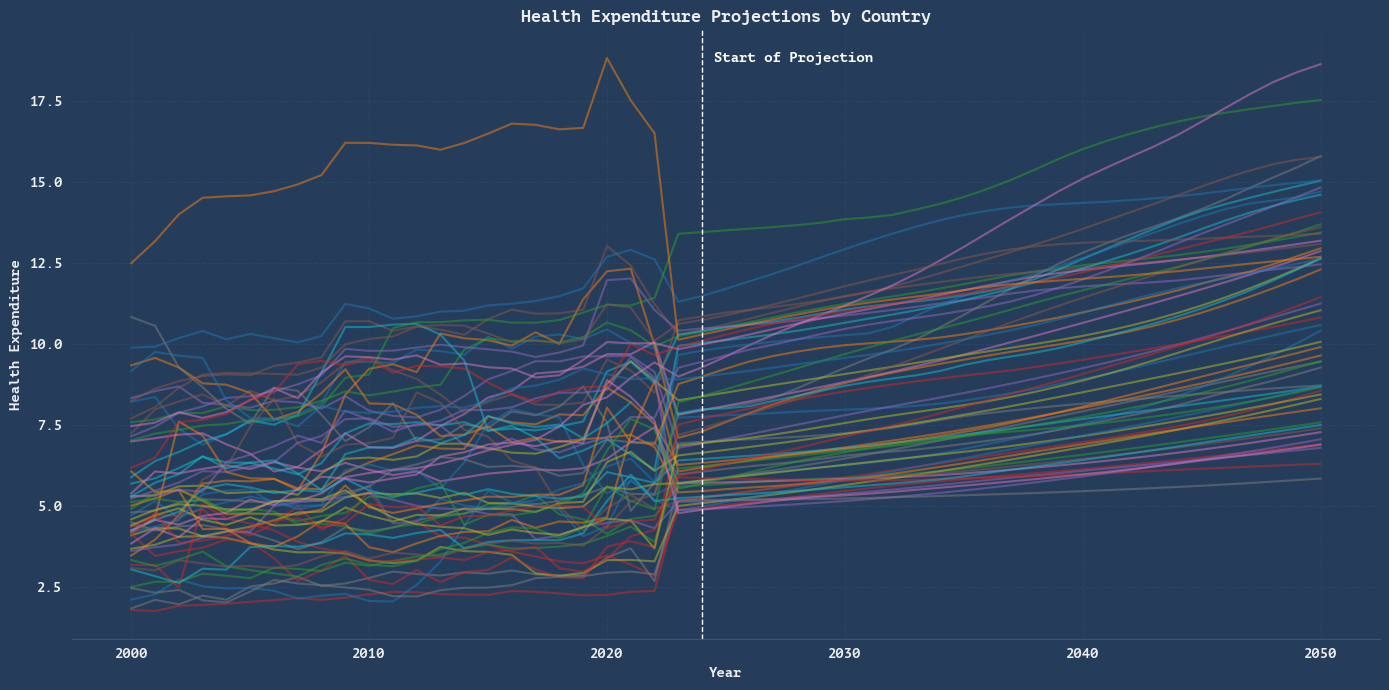

In [16]:
# Plot
plt.figure(figsize=(14, 7))

for iso, group in df_projected.groupby("ISO3"):
    plt.plot(group["Year"], group["Health_Expenditure"], alpha=0.5)  # light lines

# Add vertical line to mark the start of projection (2024)
plt.axvline(x=2024, color='white', linestyle='--', linewidth=1)
plt.text(2024.5, plt.ylim()[1]*0.95, 'Start of Projection', color='white')

plt.title("Health Expenditure Projections by Country")
plt.xlabel("Year")
plt.ylabel("Health Expenditure")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Filter for the year 2050
df_2050 = df_projected[df_projected["Year"] == 2050].copy()

# Sort by Health_Expenditure descending and get top 10
top10 = df_2050.sort_values("Health_Expenditure", ascending=False).head(10)

# Display result
print(top10[["Country", "ISO3", "Health_Expenditure"]])

          Country ISO3  Health_Expenditure
2243  South Korea  KOR           18.623577
1070        Japan  JPN           17.516665
407         China  CHN           15.790127
764        Greece  GRC           15.765559
713       Germany  DEU           15.042839
509       Czechia  CZE           15.033606
2192     Slovakia  SVK           14.821719
1988      Romania  ROU           14.696772
1019      Ireland  IRL           14.601134
2090       Serbia  SRB           14.058830


## Health-Education Effeciency Index Analysis